# Otsu thresholding of images

### Import libraries and sort files

In [1]:
import os
from glob import glob
from tifffile import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define paths to directories
img_dir = "images/fin/mips/images"
gt_dir = "images/fin/mips/labels"

In [3]:
# Sort files and check continuity
img_files = sorted(glob(os.path.join(img_dir, "*")))
gt_files = sorted(glob(os.path.join(gt_dir, "*")))

if len(img_files) != len(gt_files):
    raise ValueError("Inconsistency between number of images and labels")

In [4]:
# Pair images and ground truth labels together
pairs_files = list(zip(img_files, gt_files))

### Work on 2D projections

In [5]:
# Plot function
def plot_img(img, img_title=None, label=None, label_title=None):
    """Function for easy plotting of images"""
    n_images = 1 if label is None else 2
    fig, ax = plt.subplots(1, n_images, figsize=(10, 6))

    if n_images == 1:
        ax.imshow(img, cmap='grey')
        ax.axis('off')
        ax.set_title(img_title)

    else:
        ax[0].imshow(img, cmap='grey')
        ax[0].axis('off')
        ax[0].set_title(img_title)

        ax[1].imshow(label, cmap='grey')
        ax[1].axis('off')
        ax[1].set_title(label_title)

C:\Users\harry\AppData\Local\Temp\ipykernel_9364\1900893858.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, n_images, figsize=(10, 6))


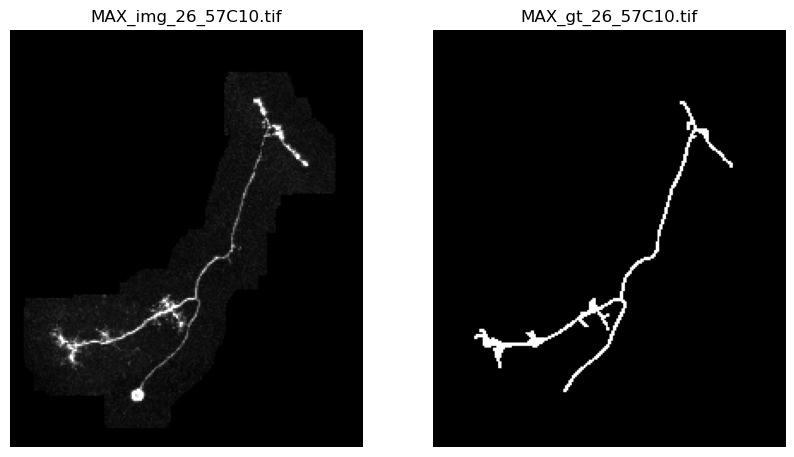

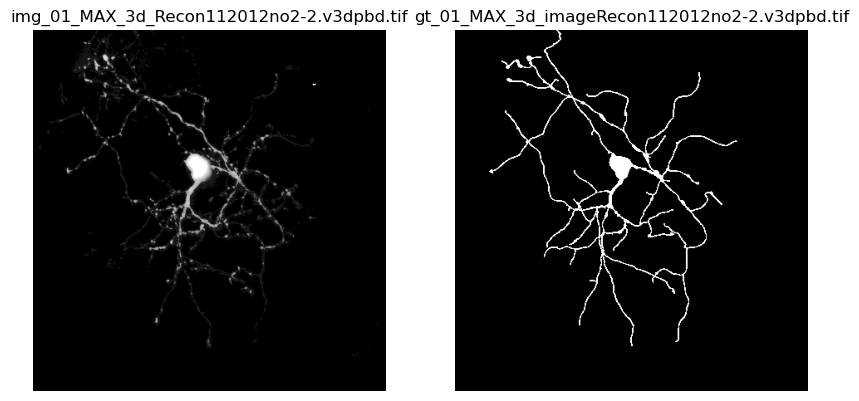

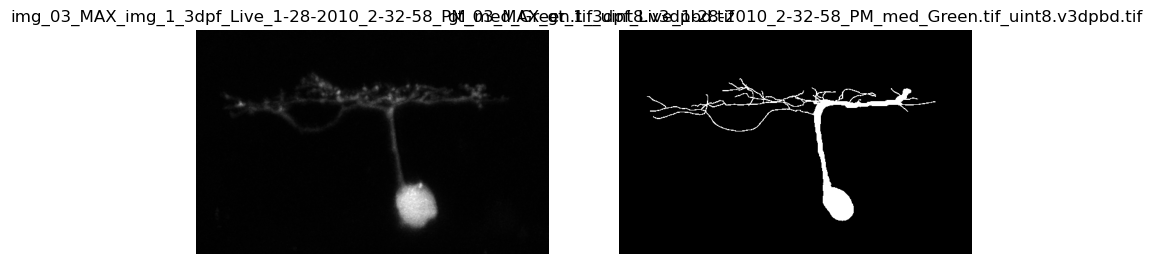

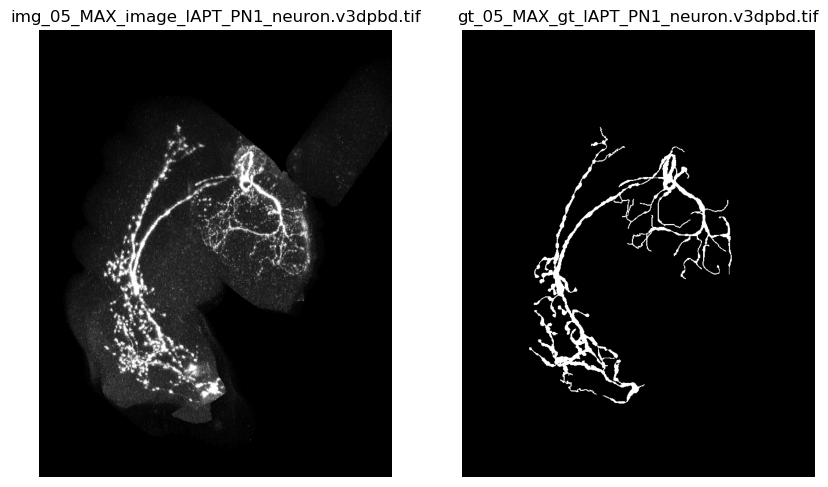

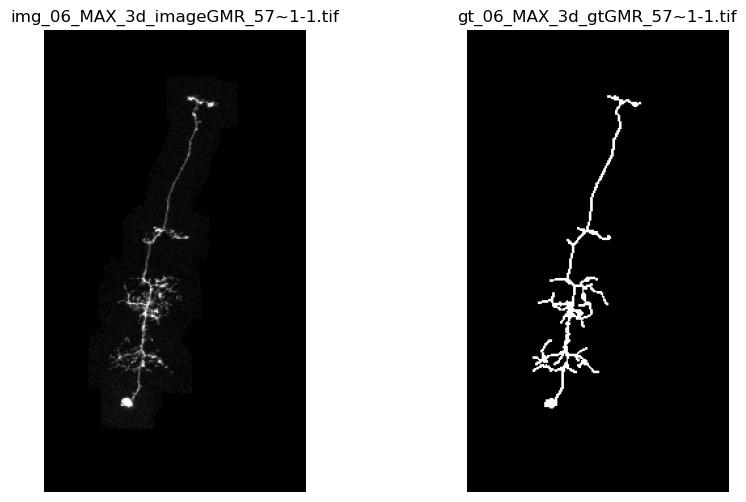

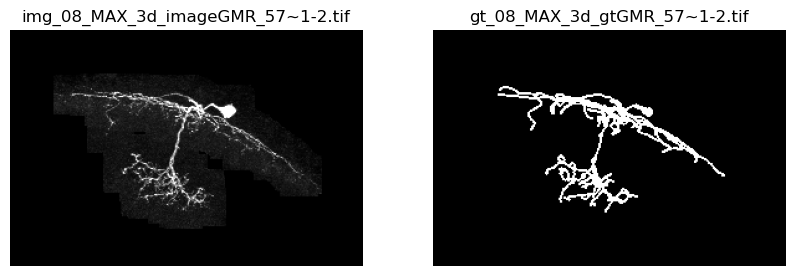

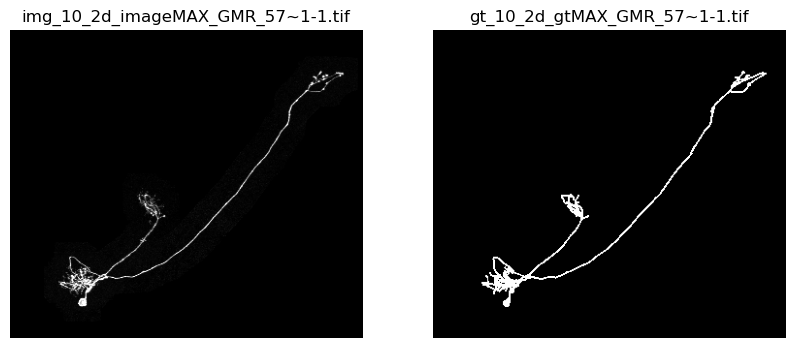

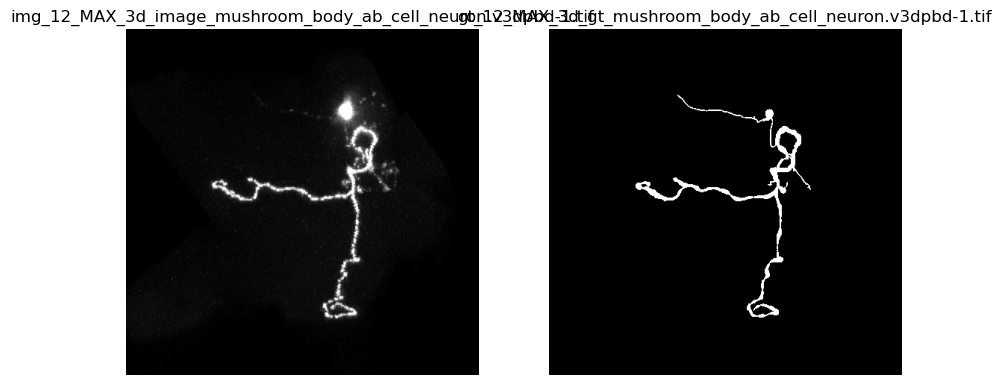

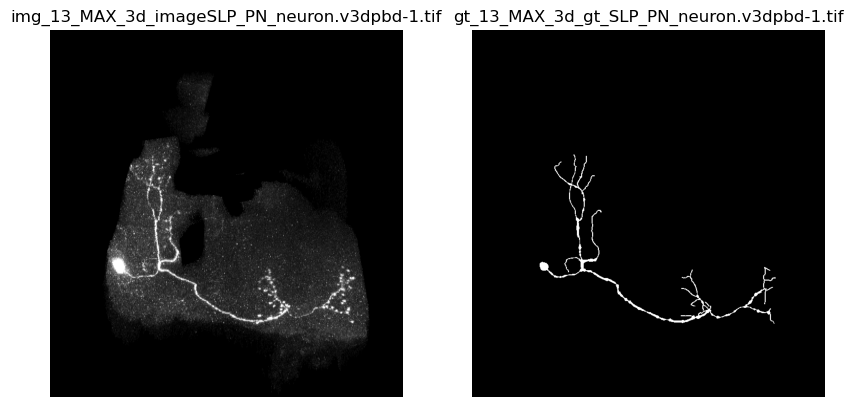

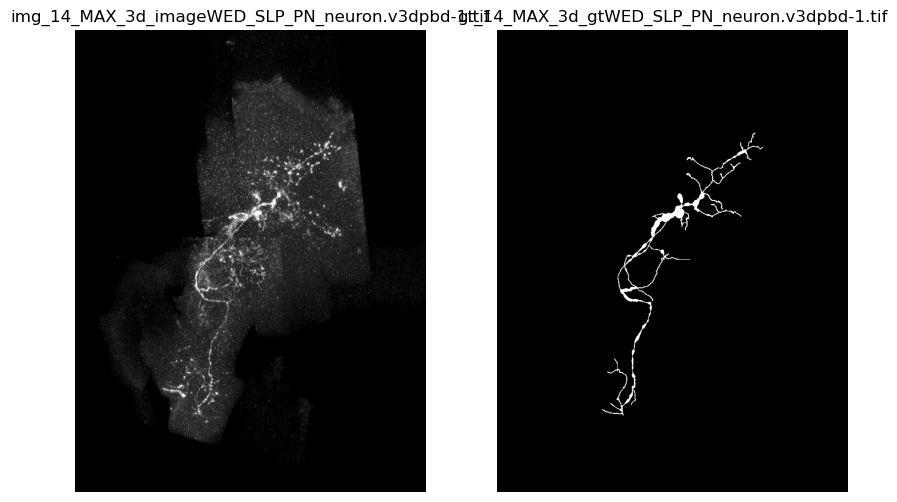

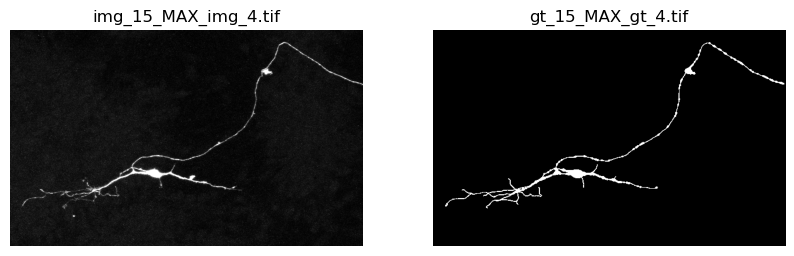

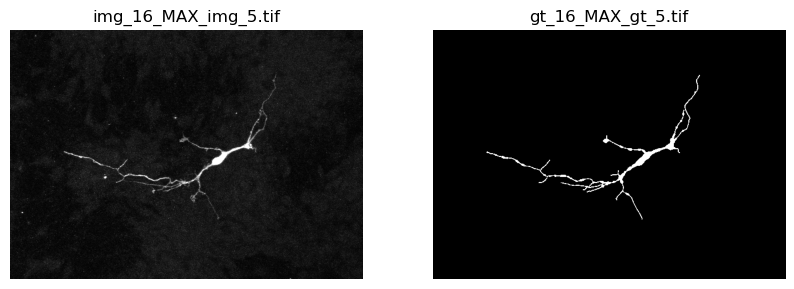

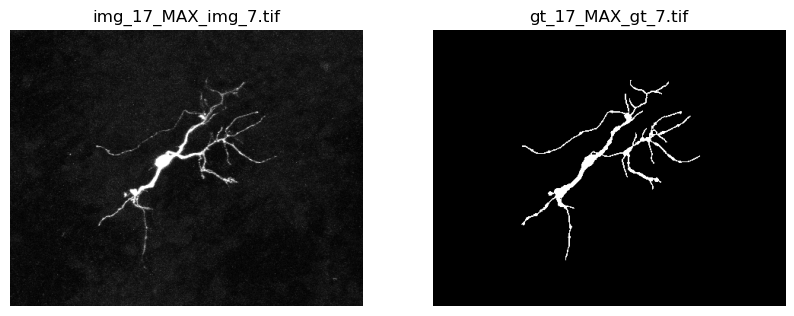

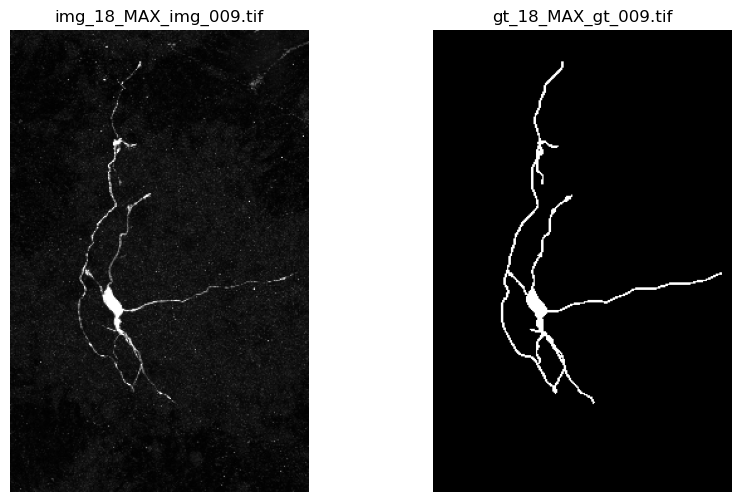

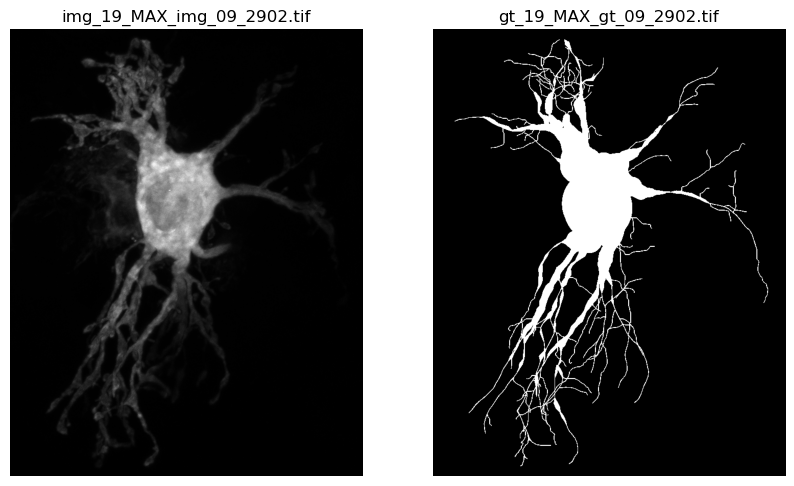

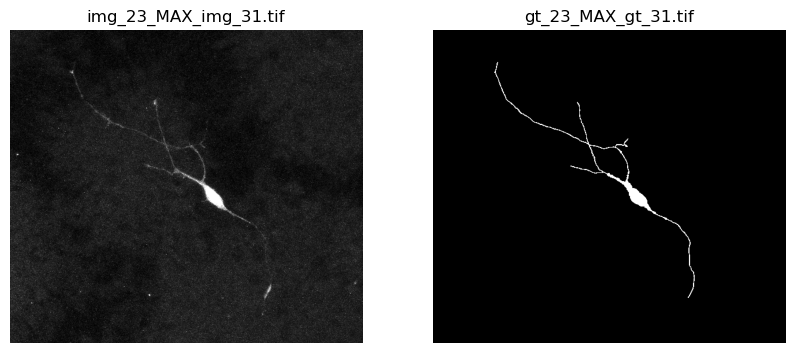

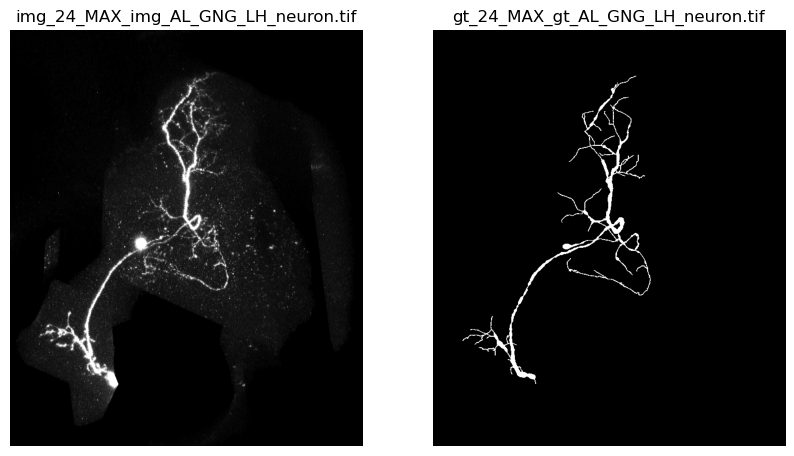

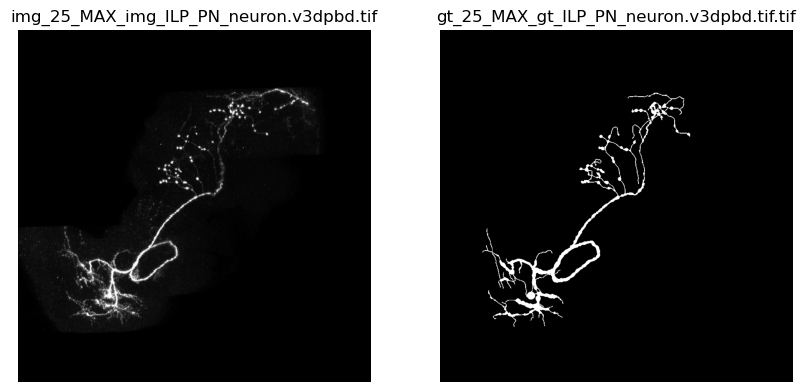

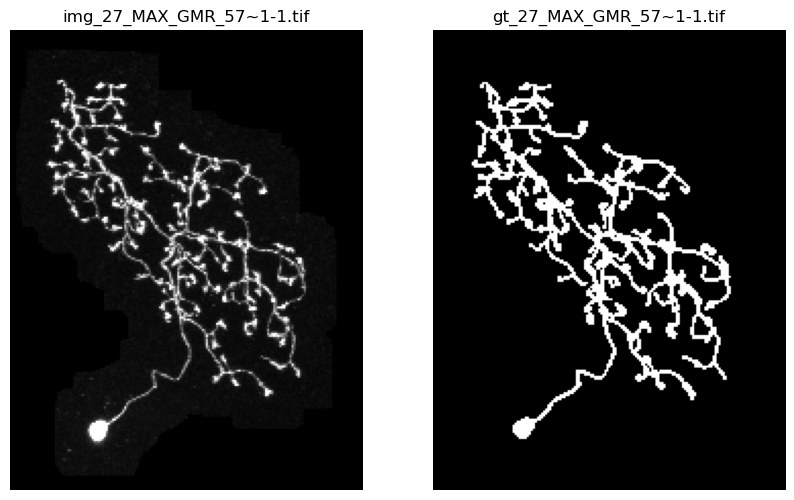

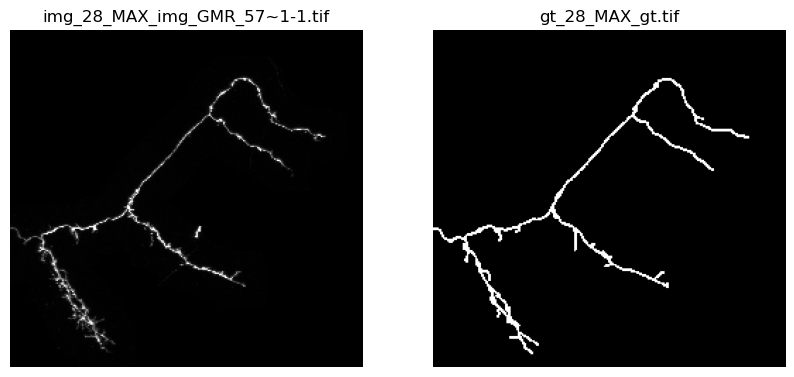

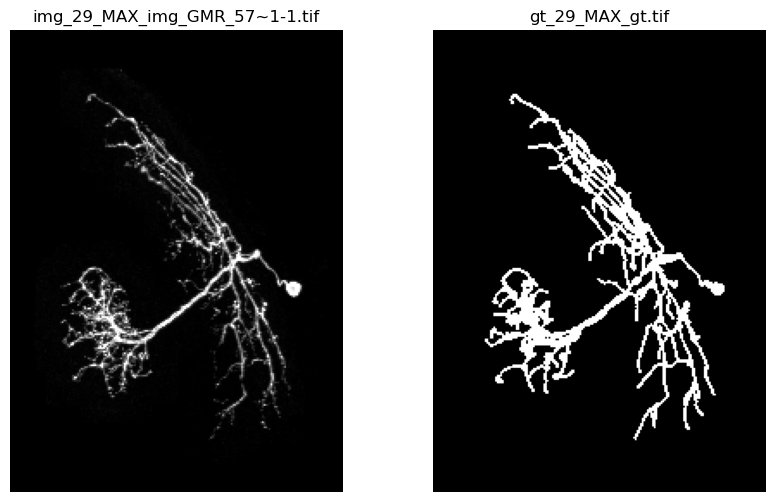

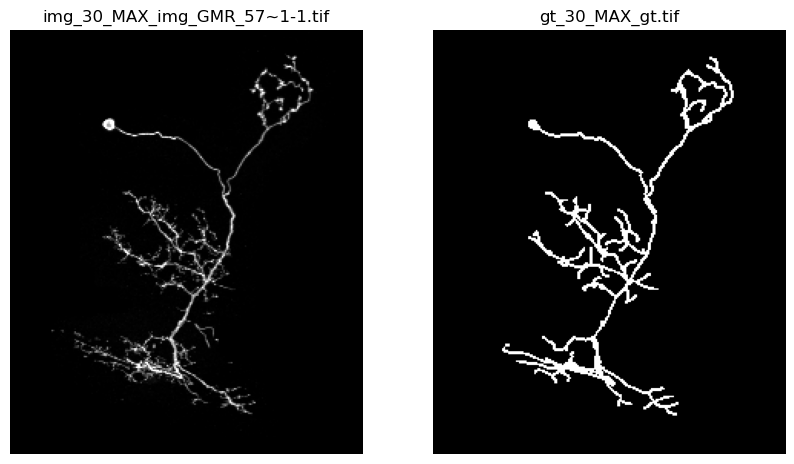

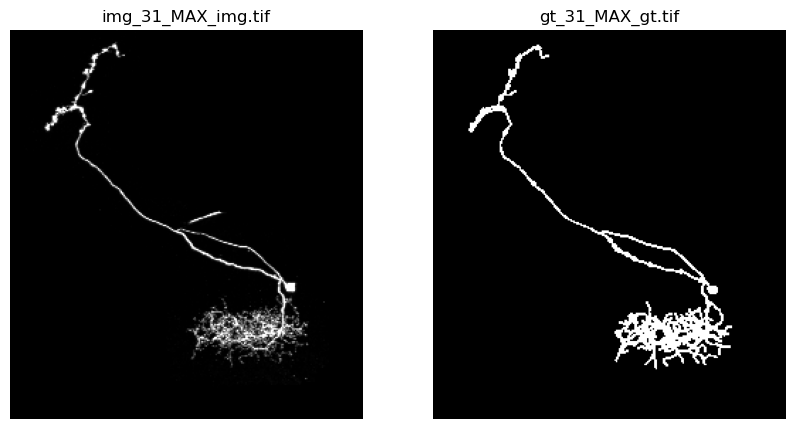

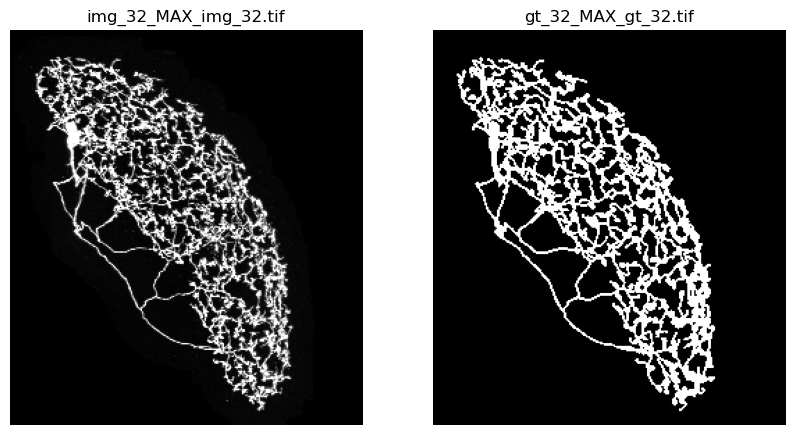

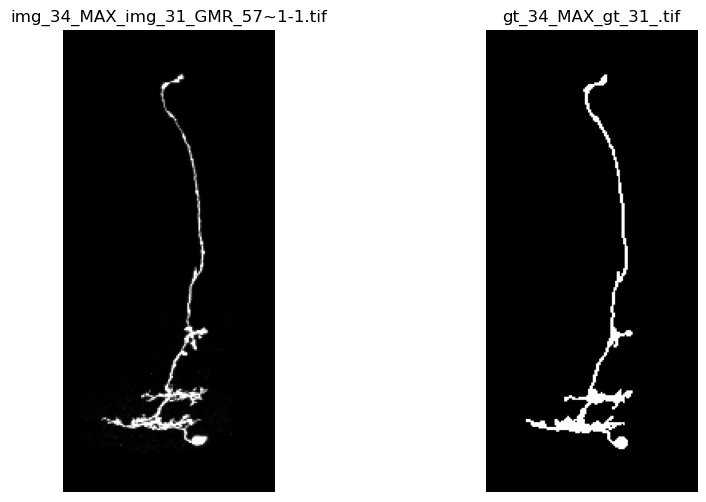

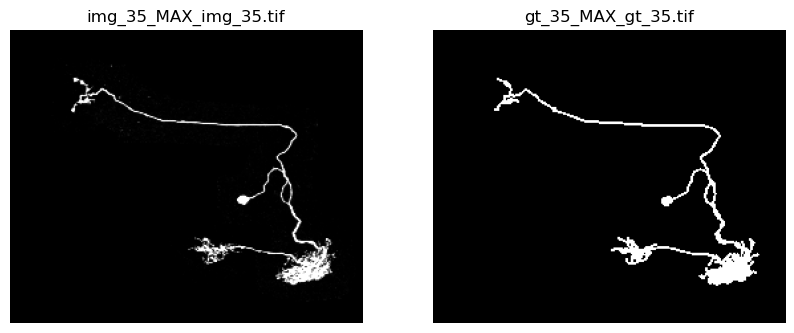

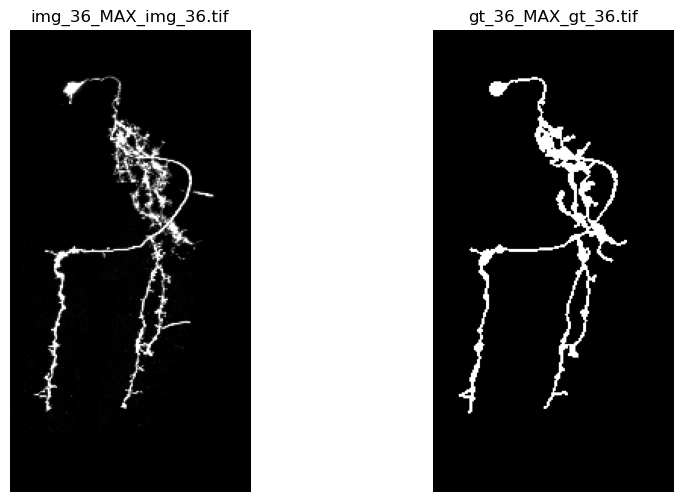

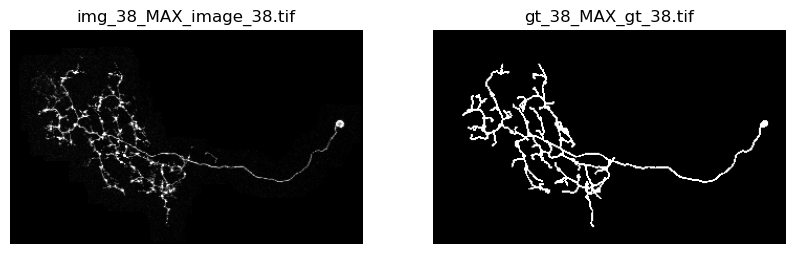

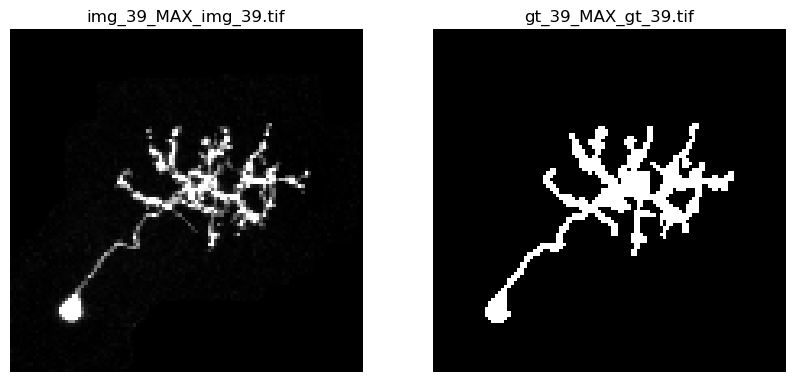

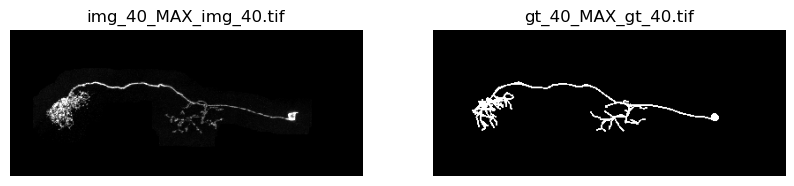

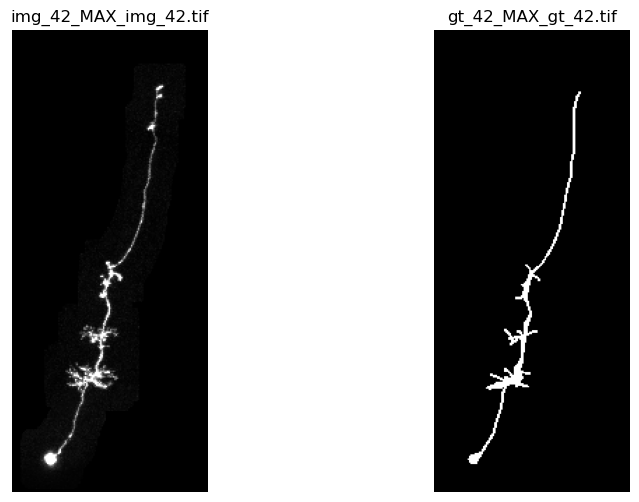

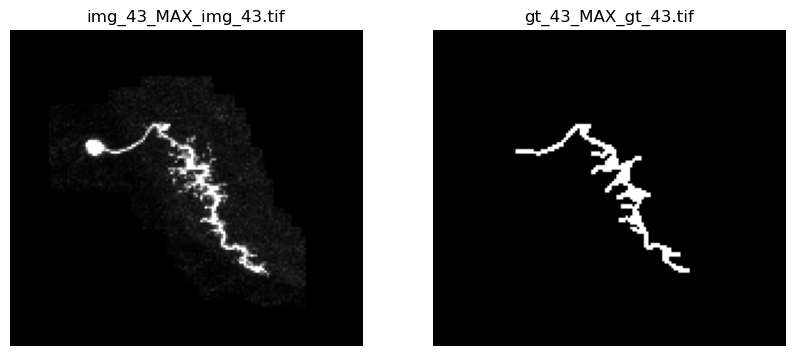

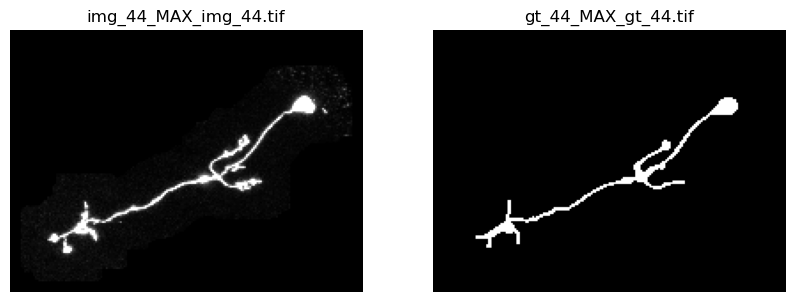

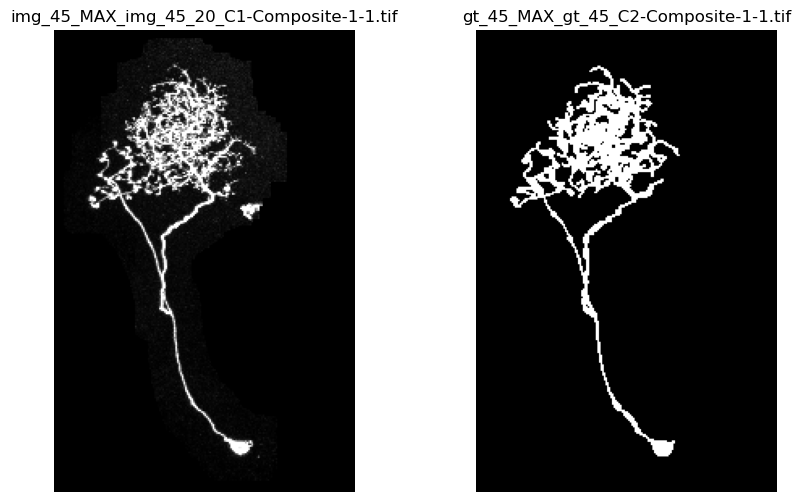

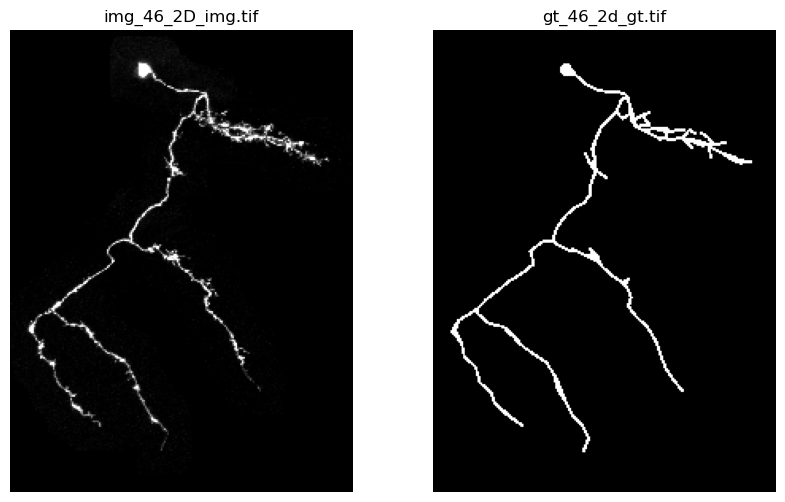

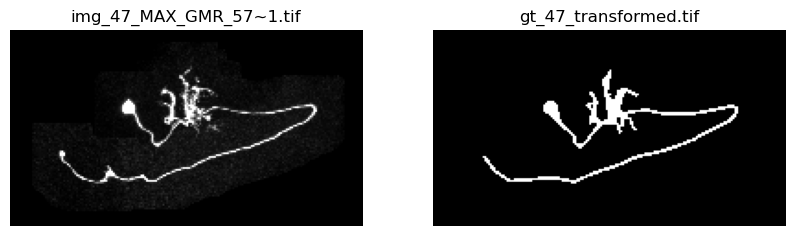

In [7]:
# Read images and label matrices

imgs = []
labs = []

for image, label in pairs_files:
    img = imread(image)
    lab = imread(label)
    
    # Plot each pairing
    plot_img(img, os.path.basename(image), lab, os.path.basename(label))
    
    imgs.append(img)
    labs.append(lab)

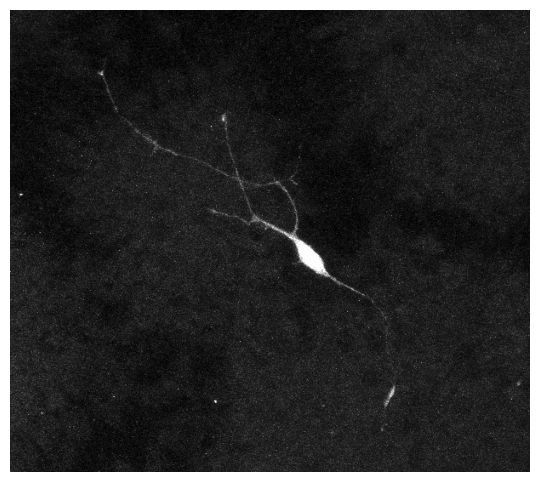

In [8]:
# Plot example of image

fig, ax = plt.subplots(1, figsize=(10,6))
ax.imshow(imgs[15], cmap="grey")
ax.set_axis_off()

### Apply otsu threshold

In [9]:
# Apply otsu threshold to images

thresholded_images = []

for image in imgs:
    otsu = threshold_otsu(image)
    image = image > otsu
    thresholded_images.append(image)

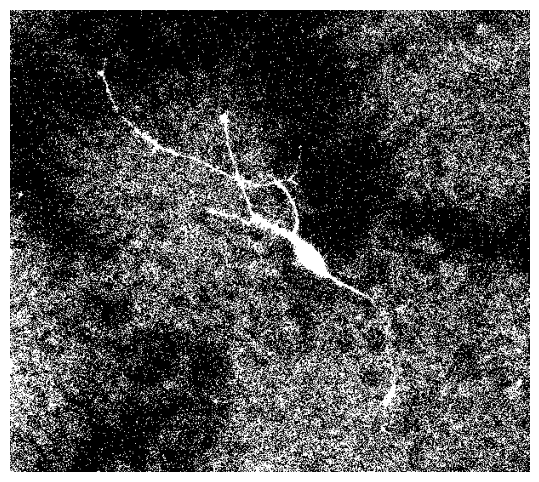

In [10]:
# Plot example of image

fig, ax = plt.subplots(1, figsize=(10,6))
ax.imshow(thresholded_images[15], cmap="grey")
ax.set_axis_off()

In [11]:
# Binarise ground truth label array

def binarise_array(array, threshold=0):
    """Function to binarise arrays"""
    bin_array = array > threshold
    return bin_array

binary_labels = []

for label in labs:
    binary_array = binarise_array(label)
    binary_labels.append(binary_array)

In [13]:
# Check continuity
print(f"Labels shape: {binary_labels[5].shape} Image shape: {thresholded_images[5].shape}")

Labels shape: (190, 284) Image shape: (190, 284)


In [14]:
# Compute metrics
def intersection_over_union(segmentation, gt):
    """A function to compute IoU"""
    intersection = np.logical_and(segmentation, gt)
    union = np.logical_or(segmentation, gt)
    score = np.sum(intersection) / np.sum(union)
    return score

def dice_coefficient(segmentation, gt):
    intersection = np.logical_and(segmentation, gt)
    score = (2 * np.sum(intersection)) / (np.sum(segmentation) + np.sum(gt))
    return score

In [15]:
# Evaluate threshold accuracy on 2D dataset

iou_scores = []
dice_scores = []

for image, label in zip(thresholded_images, binary_labels):
    iou = intersection_over_union(image, label)
    dice = dice_coefficient(image, label)
    iou_scores.append(iou)
    dice_scores.append(dice)

iou_scores = np.sum(iou_scores) / len(iou_scores)
dice_scores = np.sum(dice_scores) / len(dice_scores)
print(f"Mean IoU score: {iou_scores}, Mean Dice score: {dice_scores}")

Mean IoU score: 0.39627982333885475, Mean Dice score: 0.5499791711507163


### Work on 3D stacks

In [16]:
# Define paths to directories of 3D images
img_dir = "images/fin/3Dimages"
gt_dir = "images/fin/3Dlabels"

In [17]:
# Sort files and check continuity
img_files = sorted(glob(os.path.join(img_dir, "*")))
gt_files = sorted(glob(os.path.join(gt_dir, "*")))

if len(img_files) != len(gt_files):
    raise ValueError("Inconsistency between number of images and labels")

In [18]:
# Pair images and ground truth labels together
pairs_files = list(zip(img_files, gt_files))

In [19]:
# Read in stacks
threed_images = []
threed_labels = []

for image, label in pairs_files:
    img = imread(image)
    lab = imread(label)

    threed_images.append(img)
    threed_labels.append(lab)

In [20]:
# Apply otsu threshold to images

thresholded_images = []

for image in threed_images:
    otsu = threshold_otsu(image)
    image = image > otsu
    thresholded_images.append(image)

In [21]:
# Binarise ground truth label array

binary3d_labels = []

for label in threed_labels:
    binary_array = binarise_array(label)
    binary3d_labels.append(binary_array)

In [22]:
# Calculate IoU and Dice scores

iou_scores = []
dice_scores = []

for image, label in zip(thresholded_images, binary3d_labels):
    iou = intersection_over_union(image, label)
    dice = dice_coefficient(image, label)
    iou_scores.append(iou)
    dice_scores.append(dice)

iou_scores = np.sum(iou_scores) / len(iou_scores)
dice_scores = np.sum(dice_scores) / len(dice_scores)
print(f"Mean IoU score: {iou_scores}, Mean Dice score: {dice_scores}")

Mean IoU score: 0.2392507152686671, Mean Dice score: 0.37171348852142466
